In [66]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = [18, 9]
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)


In [37]:
polygon = '51.5087,-3.2419:51.5112,-3.2396:51.5047,-3.2129:51.5047,-3.1835:51.4986,-3.1842:51.4948,-3.1930:51.4981,-3.2225:51.5009,-3.2298:51.5087,-3.2419'
start_year = 2016
end_year = 2019
start_month = 1
end_month = 13


In [38]:
for i in range (start_year,end_year):
    for j in range (start_month,end_month):
        year = str(i)
        month = '0' + str(j) if len(str(j)) == 1 else str(j)
        date = year + '-' + month
        url = 'https://data.police.uk/api/crimes-street/all-crime?poly=' + polygon + '&date=' + date
        data = requests.get(url).json()
        if i == start_year and j == start_month:
            df = pd.io.json.json_normalize(data)
        else:
            df2 = pd.io.json.json_normalize(data)
            df = df.append(df2)
df

,category,context,id,location.latitude,location.longitude,location.street.id,location.street.name,location_subtype,location_type,month,outcome_status,outcome_status.category,outcome_status.date,persistent_id
0,anti-social-behaviour,,46324099,51.501674,-3.205263,1082889,On or near Western Avenue,,Force,2016-01,NaN,NaN,NaN,45a29056b24d650b5dae8801d7e6abccf1498c5c87d267...
1,anti-social-behaviour,,46324743,51.502279,-3.199747,1082902,On or near Llantarnam Road,,Force,2016-01,NaN,NaN,NaN,78247bac7cc1e92ad93185d51e8db7503585692c63d9c5...
2,anti-social-behaviour,,46321460,51.505533,-3.228577,1082670,On or near Station Road,,Force,2016-01,NaN,NaN,NaN,02815dcef1d902644ecb7f359a3657687a771e5799180e...
3,anti-social-behaviour,,46321050,51.502152,-3.212148,1082878,On or near Waterston Road,,Force,2016-01,NaN,NaN,NaN,c80af657a689b41216c54a26ab0a48e79c4f765eec5a55...
4,anti-social-behaviour,,46321620,51.497860,-3.194027,1081701,On or near Cross Place,,Force,2016-01,NaN,NaN,NaN,48c74af183a357ae83eb47c60c85c993808e2c0b400a1e...
5,anti-social-behaviour,,46327551,51.499777,-3.211394,1081707,On or near Lydstep Crescent,,Force,2016-01,NaN,NaN,NaN,aef82ebdad9577be86d7a3f7925cbaa9ed3e246f410c01...
6,anti-social-behaviour,,46327975,51.500988,-3.203790,1082904,On or near Clos Menter,,Force,2016-01,NaN,NaN,NaN,2b6e2d1db69374a02f606d0596082cb6ef2bda477622b6...
7,anti-social-behaviour,,46322925,51.499777,-3.211394,1081707,On or near Lydstep Crescent,,Force,2016-01,NaN,NaN,NaN,e24068f269cf49c60803abe1b69c68c97a37cfba35ccd8...
8,anti-social-behaviour,,46322680,51.498733,-3.210559,1081708,On or near Llanmorlais Road,,Force,2016-01,NaN,NaN,NaN,0d10900fdf4557f039ec55dbdc86bf75f53251ddecbb96...
9,anti-social-behaviour,,46323102,51.498579,-3.184249,1081597,On or near Whitchurch Road,,Force,2016-01,NaN,NaN,NaN,df50fa16717e23e0324718bceea098520ffd866deafc5c...


In [39]:
df2 = df[['category','month','outcome_status','id']].groupby(['category', 'month'], as_index=False).agg(['mean', 'count'])
df2 = df2.reset_index()
df2.columns = df2.columns.droplevel(0)
df2.columns = ['category', 'month', 'outcome_status_mean', 'outcome_status_count', 'id_mean', 'id_count']
df2

,category,month,outcome_status_mean,outcome_status_count,id_mean,id_count
0,anti-social-behaviour,2016-01,NaN,0,4.632230e+07,20
1,anti-social-behaviour,2016-02,NaN,0,4.687556e+07,19
2,anti-social-behaviour,2016-03,NaN,0,4.730630e+07,24
3,anti-social-behaviour,2016-04,NaN,0,4.834822e+07,27
4,anti-social-behaviour,2016-05,NaN,0,4.877849e+07,30
5,anti-social-behaviour,2016-06,NaN,0,4.944778e+07,37
6,anti-social-behaviour,2016-07,NaN,0,5.015193e+07,37
7,anti-social-behaviour,2016-08,NaN,0,5.057150e+07,44
8,anti-social-behaviour,2016-09,NaN,0,5.120242e+07,34
9,anti-social-behaviour,2016-10,NaN,0,5.196660e+07,49


In [40]:
df3 = df[['month','outcome_status','id']].groupby(['month'], as_index=False).agg(['mean', 'count'])
df3 = df3.reset_index()
df3.columns = df3.columns.droplevel(0)
df3.columns = ['month', 'outcome_status_mean', 'outcome_status_count', 'id_mean', 'id_count']
df3

,month,outcome_status_mean,outcome_status_count,id_mean,id_count
0,2016-01,NaN,0,4.632206e+07,145
1,2016-02,NaN,0,4.687643e+07,119
2,2016-03,NaN,0,4.730551e+07,141
3,2016-04,NaN,0,4.844872e+07,163
4,2016-05,NaN,0,4.885526e+07,207
5,2016-06,NaN,0,4.954939e+07,160
6,2016-07,NaN,0,5.023594e+07,190
7,2016-08,NaN,0,5.057451e+07,161
8,2016-09,NaN,0,5.120221e+07,164
9,2016-10,NaN,0,5.205965e+07,190


Text(0.5,0,'Date')

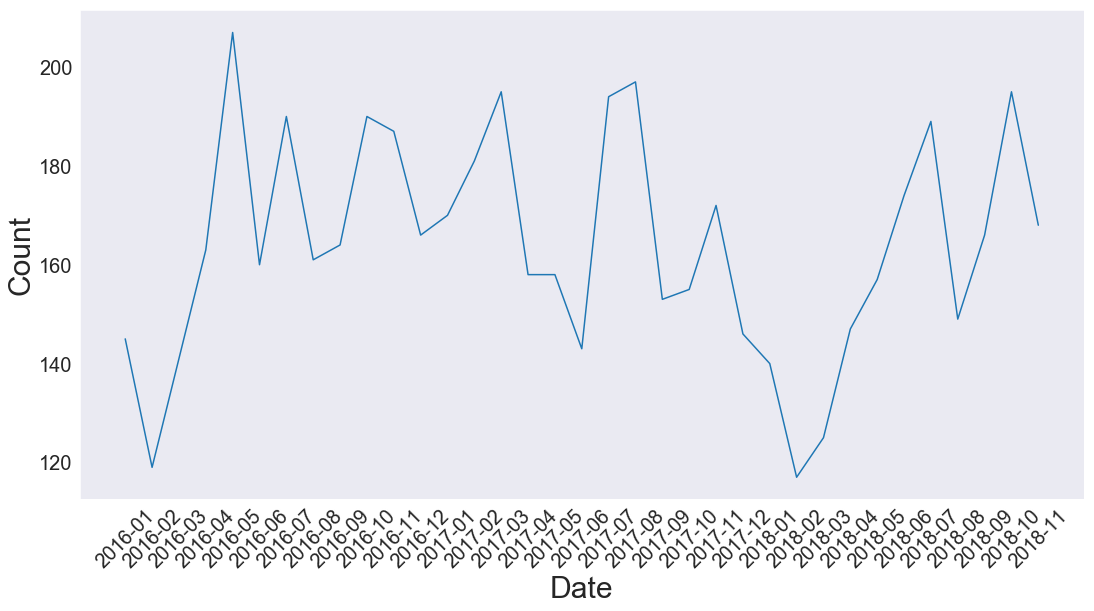

In [41]:
sns.lineplot(x="month", y="id_count",data=df3)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=30)
plt.xlabel('Date', fontsize=30)

Text(0.5,0,'Date')

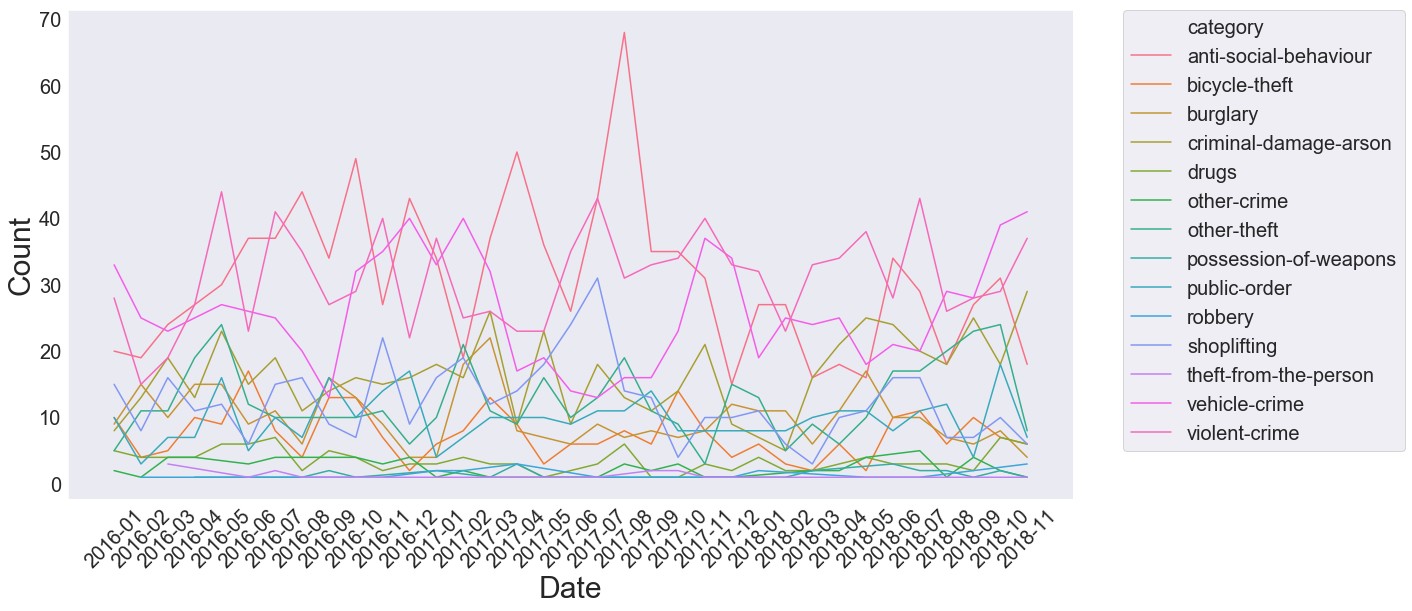

In [42]:
sns.set_style("dark")

sns.lineplot(x="month", y="id_count", hue="category",data=df2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 20})
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=30)
plt.xlabel('Date', fontsize=30)

In [60]:
df4 = df[['category','month','outcome_status','outcome_status.category','id']].groupby(['category','outcome_status.category'], as_index=False).agg(['mean', 'count'])
df4 = df4.reset_index()
df4.columns = df4.columns.droplevel(0)
df4.columns = ['category', 'outcome_status_category', 'outcome_status_mean', 'outcome_status_count', 'id_mean', 'id_count']
df4

,category,outcome_status_category,outcome_status_mean,outcome_status_count,id_mean,id_count
0,bicycle-theft,Awaiting court outcome,NaN,0,6.941316e+07,1
1,bicycle-theft,Court result unavailable,NaN,0,4.911288e+07,2
2,bicycle-theft,Investigation complete; no suspect identified,NaN,0,5.707403e+07,228
3,bicycle-theft,Local resolution,NaN,0,5.015928e+07,1
4,bicycle-theft,Offender given community sentence,NaN,0,5.404814e+07,1
5,bicycle-theft,Offender sent to prison,NaN,0,5.851248e+07,1
6,bicycle-theft,Status update unavailable,NaN,0,6.005080e+07,9
7,bicycle-theft,Unable to prosecute suspect,NaN,0,5.546162e+07,15
8,bicycle-theft,Under investigation,NaN,0,6.908840e+07,4
9,burglary,Awaiting court outcome,NaN,0,6.412690e+07,3


In [94]:
cat_compare = df4.pivot('category', 'outcome_status_category', 'id_count')
cat_compare['Total'] = cat_compare.sum(axis=1)
s = cat_compare.sum()
s.name = "total"
cat_compare = cat_compare.append(s)
cat_compare


outcome_status_category,Action to be taken by another organisation,Awaiting court outcome,Court case unable to proceed,Court result unavailable,Defendant found not guilty,Defendant sent to Crown Court,Formal action is not in the public interest,Further investigation is not in the public interest,Investigation complete; no suspect identified,Local resolution,...,Offender given penalty notice,Offender given suspended prison sentence,Offender ordered to pay compensation,Offender otherwise dealt with,Offender sent to prison,Status update unavailable,Suspect charged as part of another case,Unable to prosecute suspect,Under investigation,Total
category,,,,,,,,,,,,,,,,,,,,,
bicycle-theft,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,228.0,1.0,...,NaN,NaN,NaN,NaN,1.0,9.0,NaN,15.0,4.0,262.0
burglary,NaN,3.0,1.0,4.0,3.0,NaN,NaN,NaN,277.0,NaN,...,NaN,1.0,NaN,NaN,15.0,7.0,5.0,24.0,8.0,349.0
criminal-damage-arson,NaN,4.0,3.0,10.0,2.0,NaN,2.0,1.0,412.0,10.0,...,1.0,1.0,1.0,1.0,5.0,17.0,5.0,71.0,8.0,577.0
drugs,NaN,8.0,NaN,6.0,NaN,1.0,NaN,3.0,2.0,12.0,...,5.0,3.0,NaN,3.0,2.0,12.0,NaN,8.0,6.0,119.0
other-crime,1.0,2.0,1.0,4.0,1.0,NaN,NaN,3.0,13.0,2.0,...,NaN,1.0,NaN,1.0,1.0,9.0,NaN,30.0,1.0,74.0
other-theft,NaN,3.0,1.0,2.0,1.0,NaN,3.0,4.0,292.0,4.0,...,NaN,1.0,NaN,NaN,2.0,13.0,1.0,96.0,8.0,438.0
possession-of-weapons,NaN,5.0,1.0,4.0,2.0,NaN,NaN,NaN,2.0,2.0,...,NaN,NaN,NaN,1.0,5.0,NaN,NaN,6.0,NaN,33.0
public-order,NaN,5.0,4.0,9.0,5.0,NaN,2.0,1.0,71.0,16.0,...,NaN,1.0,NaN,1.0,4.0,9.0,NaN,188.0,7.0,340.0
robbery,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,4.0,2.0,22.0


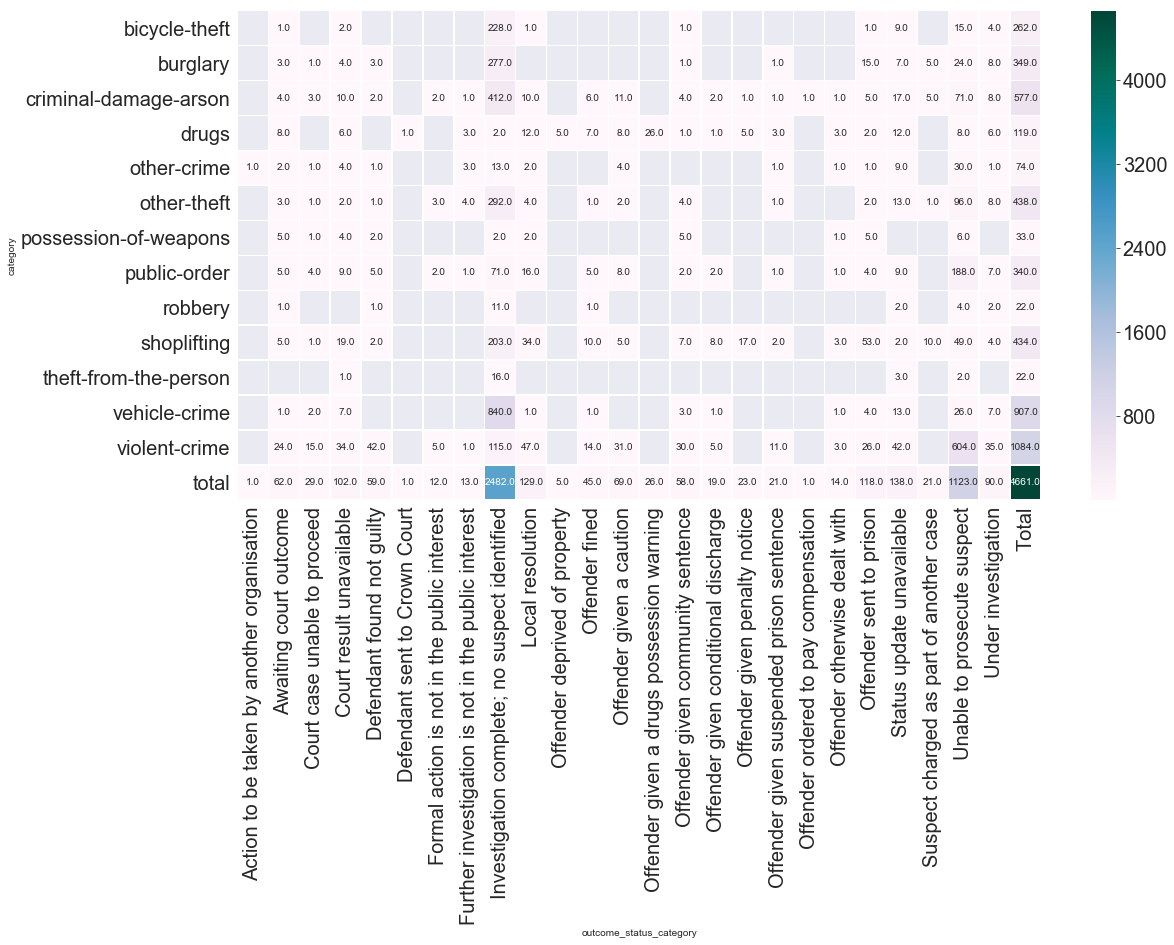

In [95]:
g= sns.heatmap(cat_compare,linewidths=.5, cmap="PuBuGn", annot=True, fmt='.1f')

In [58]:
df3[24:34].id_count.sum()+156

1715

1715